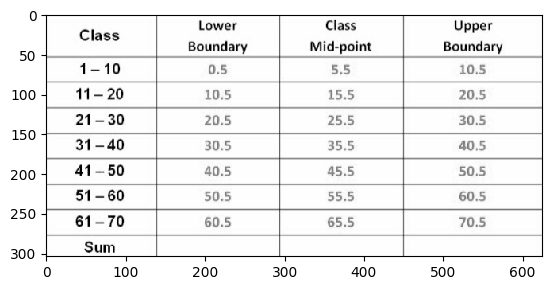

In [31]:
import cv2
import numpy as np
#takes in img as np nd array
#taking in as grey scale makes it so we do not use RGB values only a single value
img = cv2.imread('TestTableYellow.png', cv2.IMREAD_GRAYSCALE)
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest',cmap='gray')
plt.show()

In [32]:
from collections import deque
def flood_fill_bfs(img, x, y, color_of_point, paint_color):
    top_left = (x,y)
    bottom_right = (-1,-1)
    queue = deque([(x,y)])
    img[x,y] = paint_color
    while queue:
        current_x, current_y = queue.popleft()
        neighbors = [(current_x - 1, current_y),
                        (current_x + 1, current_y),
                        (current_x, current_y-1),
                        (current_x, current_y+1)
        ]
        x_high, y_high = bottom_right
        if current_x >= x_high:
            x_high = current_x 
        if current_y >= y_high:
            y_high = current_y
        bottom_right = (x_high,y_high)
        x_low, y_low = top_left
        if current_x <= x_low:
            x_low = current_x 
        if current_y <= y_low:
            y_low = current_y
        top_left = (x_low,y_low)
 
        for neighbor_x, neighbor_y in neighbors:
            if 0 <= neighbor_x < len(img) and 0 <= neighbor_y < len(img[0]) and img[neighbor_x,neighbor_y] == color_of_point:
                # lowest_x, rightmost_y = bottom_right
                # if neighbor_x >= lowest_x:
                #     lowest_x = neighbor_x 
                # if neighbor_y >= rightmost_y:
                #     rightmost_y = neighbor_y
                # bottom_right = (lowest_x,rightmost_y)
                img[neighbor_x,neighbor_y] = paint_color
                queue.append((neighbor_x,neighbor_y))
    return (top_left, bottom_right)

In [33]:
from collections import defaultdict
frequencyMap = defaultdict(lambda: 0)
for row in img:
    for pixel in row:
        frequencyMap[pixel] += 1
 
most_common_color = max(frequencyMap, key=frequencyMap.get)
most_common_color

241

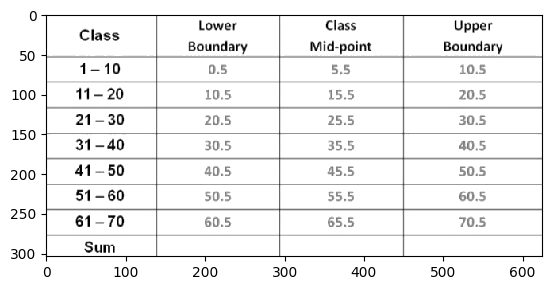

In [34]:
for i, row in enumerate(img):
    for j, pixel in enumerate(row):
        # pixel = sum(pixel)
        if pixel >= most_common_color - 20:
            img[i][j] = most_common_color #np.array([0, 100, 0])
plt.imshow(img, interpolation='nearest',cmap='gray')
plt.show()

In [35]:
def find_first_coord(_img, color):
    for i, row in enumerate(_img):
        for j, pixel in enumerate(row):
            if pixel == color:
                return i,j 
    return-1,-1

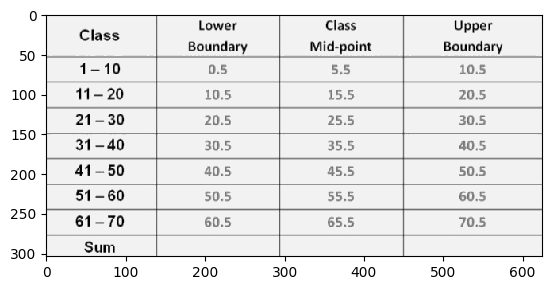

In [36]:
num_cells = 0
cell_coordinates = []
 
x,y = find_first_coord(img,most_common_color)
# print(x,y)
while x < len(img):
    while y < len(img[0])-1:
        # print(img[x,y])
        if img[x,y] == most_common_color:
            start, end = flood_fill_bfs(img, x, y, most_common_color, most_common_color+ 1)
            cell_coordinates.append((start,end))
            num_cells += 1
            x,y = end
            # print(end) 
        y+=1
    y=0
    x+=1
num_cells
 
# cell_coordinates
cell_coordinates
for top_left, btm_right in cell_coordinates:
    img[top_left[0],top_left[1]] = 255
    img[btm_right[0],btm_right[1]] = 255
 
# # i,j = find_first_coord(img, most_common_color)
# start, end = flood_fill_bfs(img, i, j, most_common_color, 120)
plt.imshow(img, interpolation='nearest',cmap='gray')
plt.show()

In [37]:
# cell_coordinates
sorted_cells = sorted(cell_coordinates, key=lambda coord:coord[0][0])
sorted_cells

[((3, 0), (52, 137)),
 ((3, 141), (52, 293)),
 ((3, 296), (52, 448)),
 ((3, 452), (52, 624)),
 ((55, 0), (83, 137)),
 ((55, 141), (83, 293)),
 ((55, 296), (83, 448)),
 ((55, 452), (83, 624)),
 ((87, 0), (115, 137)),
 ((87, 141), (115, 293)),
 ((87, 296), (115, 448)),
 ((87, 452), (115, 624)),
 ((119, 0), (148, 137)),
 ((119, 141), (148, 293)),
 ((119, 296), (148, 448)),
 ((119, 452), (148, 624)),
 ((151, 0), (179, 137)),
 ((151, 141), (179, 293)),
 ((151, 296), (179, 448)),
 ((151, 452), (179, 624)),
 ((183, 0), (212, 137)),
 ((183, 141), (212, 293)),
 ((183, 296), (212, 448)),
 ((183, 452), (212, 624)),
 ((215, 0), (243, 137)),
 ((215, 141), (243, 293)),
 ((215, 296), (243, 448)),
 ((215, 452), (243, 624)),
 ((247, 0), (275, 137)),
 ((247, 141), (275, 293)),
 ((247, 296), (275, 448)),
 ((247, 452), (275, 624)),
 ((279, 0), (303, 137)),
 ((279, 141), (303, 293)),
 ((279, 296), (303, 448)),
 ((279, 452), (303, 624))]

In [38]:
# Goal: represent tabular data with nested dictionaries. 
# i.e. {row: {col: cell}}
# Assuming a uniform n x n table (no combined rows/cols)

# start by organizing the points in separate lists?

table = {}

# Organize rows
for cell in sorted_cells:
    # print(cell)
    if cell[0][1] == 0 and cell not in table.keys():
        table[cell[0]] = [cell]
    else:
        # rowTopLeft = (cell[0][0])
        table[(cell[0][0], 0)].append(cell)
        
table
row_lengths = []
for i, c in enumerate(table.values()):
    row_lengths.append(len(c))
max_row_length = max(row_lengths)

In [39]:
# bounding box testing
from PIL import Image
from pytesseract import pytesseract

TL = (int(sorted_cells[0][0][0]), int(sorted_cells[0][0][1])) 
BR = (int(sorted_cells[0][1][0]), int(sorted_cells[0][1][1]))

rgn = img[TL[0]:BR[0], TL[1]:BR[1]]
rgn_rgb = cv2.cvtColor(rgn, cv2.COLOR_GRAY2RGB)
# rgn_rgb = np.reshape(rgn_rgb, (540, 320))
# rgn_rgb = Image.fromarray('RGB', rgn.shape[:2], rgn, 'raw', 'BGR', 0, 0)
rgn_rgb = Image.fromarray(rgn_rgb)
rgn_rgb

path_to_cmd = r"C:\Users\matthew.hui\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
pytesseract.tesseract_cmd = path_to_cmd
print(pytesseract.image_to_string(rgn_rgb))


# # [TL, BR]
# print(region)

# plt.imshow(region)
# plt.show()

Class



In [65]:
# {(TL, BR): data}
data_table = {}

path_to_cmd = r"C:\Users\matthew.hui\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
pytesseract.tesseract_cmd = path_to_cmd

extracted_data = [ [0] * max_row_length for i in range(len(table)) ] # array of extracted data only
# print(extracted_data)

row_counter = 0
col_counter = 0
prev_TL_row = sorted_cells[0][0][0]
# print(prev_TL_row)
for cell in sorted_cells:
    TL = (int(cell[0][0]), int(cell[0][1])) 
    BR = (int(cell[1][0]), int(cell[1][1])) 

    if TL[0] != prev_TL_row:
        # print("resetting")
        row_counter += 1
        prev_TL_row = TL[0]
        col_counter = 0

    # Extract cell data using OCR here
    rgn = img[TL[0]:BR[0], TL[1]:BR[1]]
    rgn_rgb = cv2.cvtColor(rgn, cv2.COLOR_GRAY2RGB)
    # rgn_rgb = np.reshape(rgn_rgb, (540, 320))
    # rgn_rgb = Image.fromarray('RGB', rgn.shape[:2], rgn, 'raw', 'BGR', 0, 0)

    rgn_rgb = Image.fromarray(rgn_rgb)
    # data_table[cell] = pytesseract.image_to_string(rgn_rgb)
    read_result = pytesseract.image_to_string(rgn_rgb)
    cleaned_result = read_result.replace('\n', ' ').strip()

    if cleaned_result.isdigit():
        extracted_data[row_counter][col_counter] = int(cleaned_result)
    elif cleaned_result.replace('.', '', 1).isdigit():
        extracted_data[row_counter][col_counter] = float(cleaned_result)
    else:
        extracted_data[row_counter][col_counter] = cleaned_result

    col_counter += 1
    
    # print(row_counter, col_counter)

extracted_data


[['Class', 'Lower Boundary', 'Class Mid-point', 'Upper Boundary'],
 ['1-10', 0.5, 5.5, 10.5],
 ['11-20', 10.5, 15.5, 20.5],
 ['21-30', 20.5, 25.5, 30.5],
 ['31-40', 30.5, 35.5, 40.5],
 ['41-50', 40.5, 45.5, 50.5],
 ['51-60', 50.5, 55.5, 60.5],
 ['61-70', 60.5, 65.5, 70.5],
 ['', '', '', '']]

In [68]:
import pandas as pd

finalized_data = pd.DataFrame(extracted_data)

with pd.ExcelWriter(r'C:\Users\matthew.hui\Documents\test.xlsx') as writer:
    finalized_data.to_excel(writer,sheet_name = 'data_1')

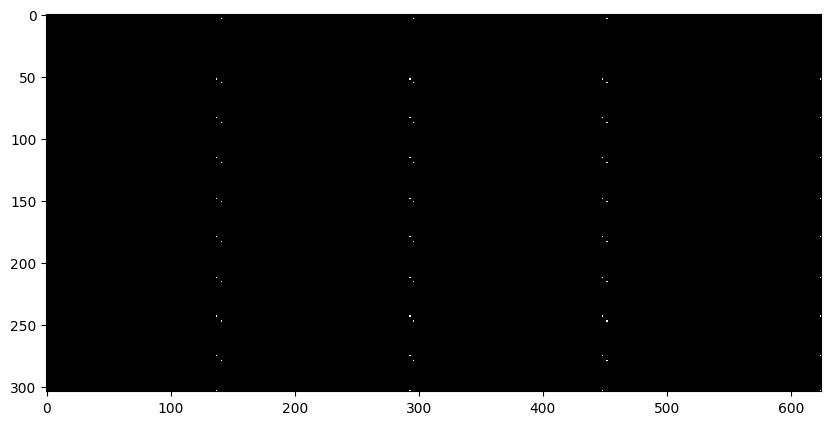

In [ ]:
# confirming coordinates

arr = np.zeros(img.shape)
 
for top_left, btm_right in cell_coordinates:
    arr[top_left[0],top_left[1]] = 255
    arr[btm_right[0],btm_right[1]] = 255
plt.figure(figsize=(10, 8))
plt.imshow(arr, interpolation='nearest',cmap='gray')
plt.show()  